In [25]:
import pandas as pandas
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str,
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pandas.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(by=['sqft_living','price'])
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,1924059029,20140617T000000,4668000.0,5.0,6.75,9640.0,13068,1,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270.0,10454.0
9254,9208900037,20140919T000000,6885000.0,6.0,7.75,9890.0,31374,2,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540.0,42730.0
3914,9808700762,20140611T000000,7062500.0,5.0,4.50,10040.0,37325,2,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930.0,25449.0
7252,6762700020,20141013T000000,7700000.0,6.0,8.00,12050.0,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940.0,8800.0


In [2]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pandas.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe["power_1"]=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name]=poly_dataframe['power_1'].apply(lambda x: x**power)
    return poly_dataframe

In [10]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 15)
target = sales['price']

In [11]:
poly1_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290.0,84100.0,2.438900e+07,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370.0,136900.0,5.065300e+07,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380.0,144400.0,5.487200e+07,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384.0,147456.0,5.662310e+07,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390.0,152100.0,5.931900e+07,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,9640.0,92929600.0,8.958413e+11,8.635911e+15,8.325018e+19,8.025317e+23,7.736406e+27,7.457895e+31,7.189411e+35,6.930592e+39,6.681091e+43,6.440572e+47,6.208711e+51,5.985197e+55,5.769730e+59
9254,9890.0,97812100.0,9.673617e+11,9.567207e+15,9.461968e+19,9.357886e+23,9.254949e+27,9.153145e+31,9.052460e+35,8.952883e+39,8.854401e+43,8.757003e+47,8.660676e+51,8.565409e+55,8.471189e+59
3914,10040.0,100801600.0,1.012048e+12,1.016096e+16,1.020161e+20,1.024241e+24,1.028338e+28,1.032452e+32,1.036581e+36,1.040728e+40,1.044891e+44,1.049070e+48,1.053266e+52,1.057480e+56,1.061709e+60
7252,12050.0,145202500.0,1.749690e+12,2.108377e+16,2.540594e+20,3.061416e+24,3.689006e+28,4.445252e+32,5.356529e+36,6.454617e+40,7.777813e+44,9.372265e+48,1.129358e+53,1.360876e+57,1.639856e+61


In [5]:
from sklearn.linear_model import LinearRegression

In [12]:
model=LinearRegression()

In [13]:
model.fit(poly1_data,target)

LinearRegression()

In [14]:
p=model.predict(poly1_data)
p

array([ 537116.3296377 ,  537116.3296377 ,  537116.3296377 , ...,
       9046207.76303971, 7144675.5365301 , 2335321.89459916])

In [15]:
model.coef_

array([ 4.56404164e-91,  6.91713475e-51,  2.57712471e-56,  2.78197887e-88,
        1.19863929e-74,  2.68575522e-71,  2.26147568e-67,  1.85900299e-63,
        1.47144116e-59,  1.09771012e-55,  7.43509038e-52,  4.23015578e-48,
        1.61618577e-44, -2.49283826e-48,  9.59718336e-53])

In [24]:
import numpy as np
def polynominal_dataframe(feature, degree, dataset):
    poly_dataframe = dataset[[feature]]
    poly_dataframe.rename(columns = {feature: 'power_1'}, inplace =True)
    if degree > 1:
        for i in range(2,degree+1):
            name = 'power_'+str(i)
            poly_dataframe[name] = np.power(poly_dataframe.power_1, i)
    return poly_dataframe

poly1_data = polynominal_dataframe('sqft_living',15,sales)
target = sales['price']
poly1_data
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(poly1_data,target)
model.coef_

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-24-d4e1233a3533>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_dataframe[name] = np.power(poly_dataframe.power_1, i)


array([ 4.56404164e-91,  6.91713456e-51,  2.57712847e-56, -4.97841222e-60,
        1.19863929e-74,  2.68575522e-71,  2.26147568e-67,  1.85900299e-63,
        1.47144116e-59,  1.09771012e-55,  7.43509038e-52,  4.23015578e-48,
        1.61618577e-44, -2.49283826e-48,  9.59718336e-53])

In [20]:
poly1_data

,id,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,3980300371,290.0,84100.0,2.438900e+07,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,2856101479,370.0,136900.0,5.065300e+07,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,1723049033,380.0,144400.0,5.487200e+07,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,1222029077,384.0,147456.0,5.662310e+07,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,6896300380,390.0,152100.0,5.931900e+07,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,1924059029,9640.0,92929600.0,8.958413e+11,8.635911e+15,8.325018e+19,8.025317e+23,7.736406e+27,7.457895e+31,7.189411e+35,6.930592e+39,6.681091e+43,6.440572e+47,6.208711e+51,5.985197e+55,5.769730e+59
9254,9208900037,9890.0,97812100.0,9.673617e+11,9.567207e+15,9.461968e+19,9.357886e+23,9.254949e+27,9.153145e+31,9.052460e+35,8.952883e+39,8.854401e+43,8.757003e+47,8.660676e+51,8.565409e+55,8.471189e+59
3914,9808700762,10040.0,100801600.0,1.012048e+12,1.016096e+16,1.020161e+20,1.024241e+24,1.028338e+28,1.032452e+32,1.036581e+36,1.040728e+40,1.044891e+44,1.049070e+48,1.053266e+52,1.057480e+56,1.061709e+60
7252,6762700020,12050.0,145202500.0,1.749690e+12,2.108377e+16,2.540594e+20,3.061416e+24,3.689006e+28,4.445252e+32,5.356529e+36,6.454617e+40,7.777813e+44,9.372265e+48,1.129358e+53,1.360876e+57,1.639856e+61


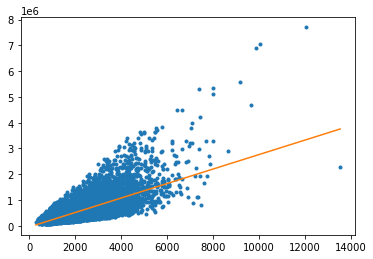

In [67]:
import matplotlib.pyplot as plt
plt.plot(poly1_data['power_1'],target,'.',
         poly1_data['power_1'], model.predict(poly1_data),'-')
         

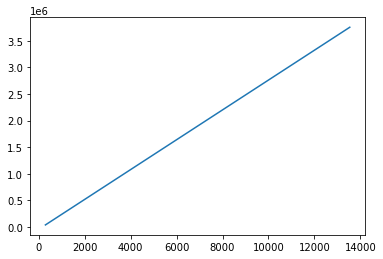

In [68]:
plt.plot(poly1_data['power_1'], model.predict(poly1_data),'-')

In [69]:
model.coef_

array([280.6235679])

In [70]:
model.intercept_

-43580.74309447396

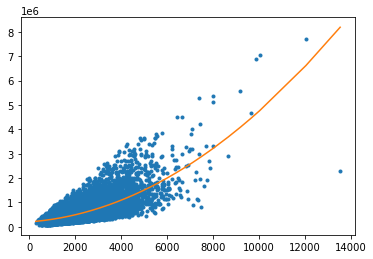

In [71]:
## 2nd order 
poly1_data = polynomial_dataframe(sales['sqft_living'], 2)
target = sales['price']
model2=LinearRegression()
model2.fit(poly1_data,target)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],target,'.',
poly1_data['power_1'], model2.predict(poly1_data),'-')

In [72]:
model2.coef_

array([6.79940947e+01, 3.85812609e-02])

In [73]:
model2.intercept_

199222.27930548496

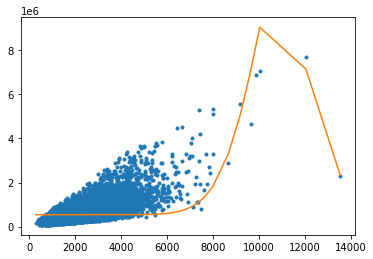

In [74]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 15)
target = sales['price']
model2=LinearRegression()
model2.fit(poly1_data,target)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],target,'.',
poly1_data['power_1'], model2.predict(poly1_data),'-')

In [75]:
model2.coef_

array([ 4.56404164e-91,  6.91713475e-51,  2.57712471e-56,  2.78197887e-88,
        1.19863929e-74,  2.68575522e-71,  2.26147568e-67,  1.85900299e-63,
        1.47144116e-59,  1.09771012e-55,  7.43509038e-52,  4.23015578e-48,
        1.61618577e-44, -2.49283826e-48,  9.59718336e-53])

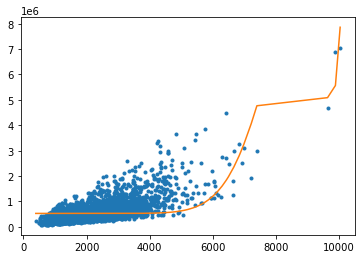

In [83]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str,
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pandas.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
sales = sales.sort_values(by=['sqft_living','price'])
poly1_data = polynomial_dataframe(sales['sqft_living'], 15)
target = sales['price']
model2=LinearRegression()
model2.fit(poly1_data,target)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],target,'.',
poly1_data['power_1'], model2.predict(poly1_data),'-')

In [84]:
model2.coef_

array([ 2.83751934e-88, -7.80224148e-49, -1.38767183e-55,  3.98272978e-59,
        1.57170169e-72,  4.27894908e-69,  2.68009626e-65,  1.63911362e-61,
        9.66435015e-58,  5.38044653e-54,  2.72563636e-50,  1.16253248e-46,
        3.33756141e-43, -6.76238818e-47,  3.43132932e-51])

In [106]:
#rss
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
(training_and_validation, testing) = train_test_split(sales, test_size=0.2)
(training, validation) = train_test_split(training_and_validation, test_size=0.5)

for degree in range(1, 16):
    poly_data = polynomial_dataframe(training['sqft_living'], degree)
    my_features = poly_data.columns # get the name of the features
    target = training['price'] # add price to the data since it's the 
    model.fit(poly_data,target) 
    predict=model.predict(polynomial_dataframe(validation['sqft_living'], degree))
    rss =mean_squared_error(validation['price'],predict)
    print ("RSS ", degree, rss)

RSS  1 70863089451.3202
RSS  2 70215125862.13794
RSS  3 72432318176.71475
RSS  4 92954065897.09946
RSS  5 155264418282.21286
RSS  6 99982796883.98708
RSS  7 2264497476838.0107
RSS  8 62527951825885.07
RSS  9 596337520523718.8
RSS  10 3109435654257967.5
RSS  11 1.0118746455774222e+16
RSS  12 2.4849748485129316e+16
RSS  13 5.874400647324018e+16
RSS  14 1.5696333366741792e+17
RSS  15 4.933882984486404e+17
